# Flow, Paths and Limit Cycles 

First read some libraries needed. 


In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

## Constructing the phase diagram
We will use
$$
\begin{array}{rl}
 x'(t) = & y \\[0.5pt]
 y'(t) = & x(1-x^2)-y
\end{array}
$$
as an example. Defining the function:

In [48]:
def rhs(t,xy):
    x,y=xy
    dx=y
    dy=x*(1-x**2)-y
    return [dx,dy]

## The phase diagram
last time we made a phase diagram. Since we will make many of them, we make a function that create them 

In [33]:
def plot_flow(ax,rhs,xrange=[-2,2],yrange=[-2,2],xnum=100,ynum=100,nullclines=False):
    # Set up u,v space
    u = np.linspace(xrange[0], xrange[1], xnum)
    v = np.linspace(yrange[0], yrange[1], ynum)
    uu, vv = np.meshgrid(u, v)

# Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = rhs(0,np.array([uu[i,j], vv[i,j]]))


# Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel,color='grey')
#Nullclines
    if nullclines: 
        ax.contour(uu, vv, u_vel, [0],colors=('r'))
        ax.contour(uu, vv, v_vel, [0],colors=('b'))

    return ax

# A function that plots a path 
def plot_solution(ax,rhs,y0,t_end,t_dim=2000,color='green',init_pt=True,linewidth=2.5):

    t = np.linspace(0, t_end, t_dim)
    X = sc.integrate.solve_ivp(rhs,t_span=[t[0],t[-1]],y0=y0,t_eval=t)
    x,y=X.y
    t=X.t
    ax.plot(x,y, color=color,linewidth=linewidth)
    if (init_pt):
        ax=plot_point(ax,y0,color=color)
    return ax

#A function to add fixed points to a phase diagram 
def plot_point(ax, coord, color='black',markersize=20):
    """Add fixed points to plot."""
    x,y=coord
    ax.plot(x,y, '.', color='black', markerfacecolor=color, markersize=markersize)
    return ax



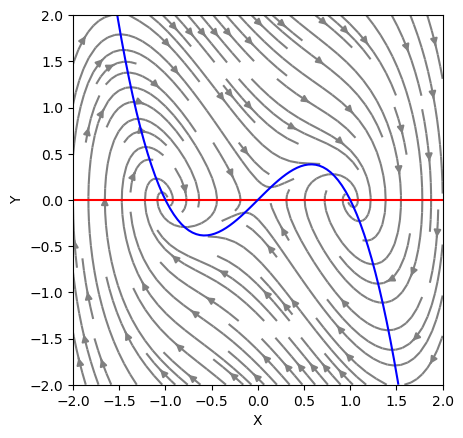

In [58]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,nullclines=True)



# Some definitions

### Definition of **flow** (Definition 2 on p 118) 
A _flow_ is a mapping $\pi: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ such that: 
1. $\pi$ is continuous
2. $\pi(\bf{x},0)=\bf{x} \ \forall \ \bf{x}\in \mathbb{R}^2$
3. $\pi(\pi(\bf{x},t_1),t_2)=\pi(\bf{x},t_1+t_2)$

### Definition of Trajectories or orbits (Definition 3 on p 118)
Suppose $I_{\bf{x}}$ is the maximal interval of existence. 
A trajectory through $\bf{x}$ is defined as 
$$
\gamma(\bf{x} )={\pi(\bf{x},t):t\in I_{\bf{x}}}
$$


- Positive *semi-orbit* is defined: $\gamma^+(\bf{x} )={\pi(\bf{x},t):t\in I_{\bf{x}}, t>0}$
- Negative *semi-orbit* is defined: $\gamma^-(\bf{x} )={\pi(\bf{x},t):t\in I_{\bf{x}}, t<0}$

### Our example
Lets plot some solutions

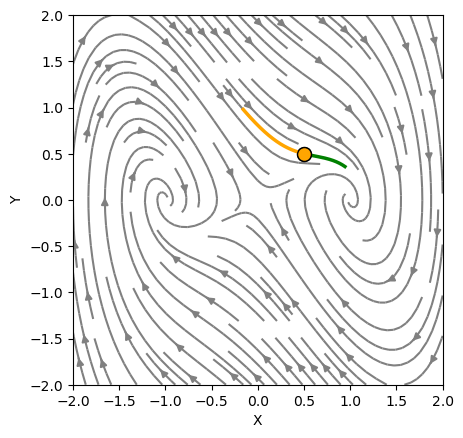

In [63]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,nullclines=False)
y0=[0.5,0.5]
ax=plot_solution(ax,rhs,y0,t_end=1)
ax=plot_solution(ax,rhs,y0,t_end=-1,color='orange')

The orange path is by going backward in time. 

### Definition of limit sets (Definition 4 on p 118)
- The positive limit set of a point $\bf{x}$
$$
\Gamma^+ (\bf{x})=\{\bf{y}, \exists \  \{t_n\} \rightarrow \infty \ s.t. \ \pi(\bf{x},t)\rightarrow \bf{y}\}
$$
- The negative limit set of a point $\bf{x}$
$$
\Gamma^- (\bf{x})=\{\bf{y}, \exists \  \{t_n\} \rightarrow - \infty \ s.t. \ \pi(\bf{x},t)\rightarrow \bf{y}\}
$$

In phase plane: critical points, closed orbit, or infinity. 

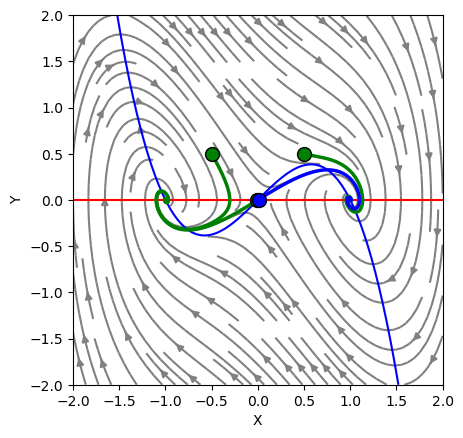

In [72]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,nullclines=True)
y0=[0.5,0.5]
ax=plot_solution(ax,rhs,y0,t_end=100)
y0=[-0.5,0.5]
ax=plot_solution(ax,rhs,y0,t_end=100)
y0=[-0.01,0]
ax=plot_solution(ax,rhs,y0,t_end=100)
y0=[0.01,0]
ax=plot_solution(ax,rhs,y0,t_end=100,color='blue')


### Invariant sets
A set $S$ is *invariant* with respect to a flow if $\bf{x}\subset S$ implies that $\gamma(\bf{x})\subset S$.


## Basins of attractions
Our example has two stable spirals and one unstable saddle point. The saddle points has eigevalues and corresponding eigenvectors:
$$
\lambda^{\pm}=-\frac{1}{2}\pm\frac{1}{2}\sqrt{5}
$$
$$
\bf{v}_\pm=\left[\begin{array}{l} 1 \\ \lambda^\pm \end{array}\right]

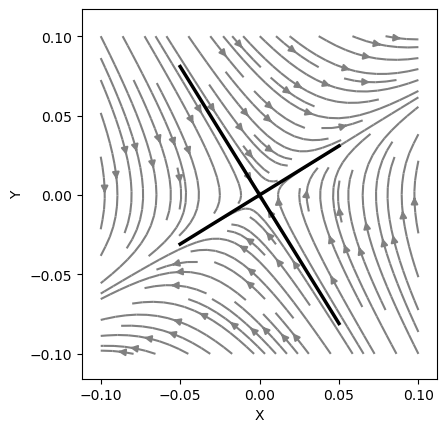

In [74]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,xrange=[-0.1,0.1],yrange=[-0.1,0.1],nullclines=False)

coord=[0,0]
scale=0.05
eigenv1=-0.5-0.5*np.sqrt(5)
X,Y=np.array([1,-1]),np.array([eigenv1,-eigenv1])
ax.plot(scale*X,scale*Y,color='black',linewidth=2.5)

eigenv2=-0.5+0.5*np.sqrt(5)
X,Y=np.array([1,-1]),np.array([eigenv2,-eigenv2])
ax.plot(scale*X,scale*Y,color='black',linewidth=2.5)

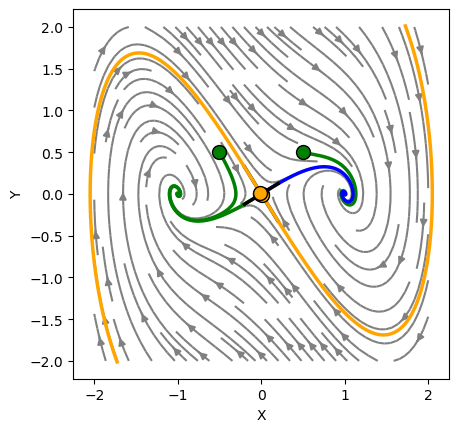

In [86]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,nullclines=False)
y0=[0.5,0.5]
ax=plot_solution(ax,rhs,y0,t_end=100)
y0=[-0.5,0.5]
ax=plot_solution(ax,rhs,y0,t_end=100)
y0=[-0.01,0]
ax=plot_solution(ax,rhs,y0,t_end=100)
y0=[0.01,0]
ax=plot_solution(ax,rhs,y0,t_end=100,color='blue')


coord=[0,0]
scale=0.2
eigenv1=-0.5-0.5*np.sqrt(5)
X,Y=np.array([1,-1]),np.array([eigenv1,-eigenv1])
ax.plot(scale*X,scale*Y,color='black',linewidth=2.5)

eigenv2=-0.5+0.5*np.sqrt(5)
X,Y=np.array([1,-1]),np.array([eigenv2,-eigenv2])
ax.plot(scale*X,scale*Y,color='black',linewidth=2.5)

## Plot a solution starting a small distance along the stable direction moving backward in time 
eps=0.01
y0=np.array([eps,eps*eigenv1])
ax=plot_solution(ax,rhs,y0,t_end=-4,color='orange')
ax=plot_solution(ax,rhs,-y0,t_end=-4,color='orange')

# Limit cycles
Lets define two new examples

In [37]:

def holling_tanner(t,X):
    # here X[0] = x and X[1] = y
    return np.array([X[0] * (1 - X[0]/7) - 6 * X[0] * X[1] / (7 + 7*X[0]),
                    0.2 * X[1] * (1 - 0.5 * X[1] / X[0])])


#Here we see an example of giving parameters, with default values, to a function
def Fitzhugh_Nagumo(t,x,theta = 0.14, omega = 0.112, gamma = 2.54, epsilon = 0.01):
    return [-x[0] * (x[0] - theta) * (x[0] - 1) - x[1] + omega,
            epsilon * (x[0] - gamma * x[1])]

def pendulum(t,x,l=1,g=9.8):
    return np.array([x[1],-np.sin(x[0])])



## The pendulum

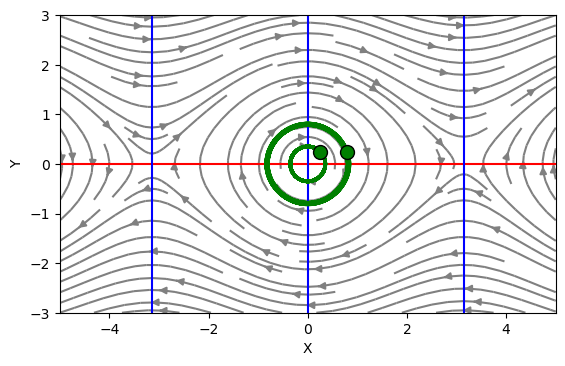

In [135]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,pendulum,xrange=[-5,5],yrange=[-3,3],nullclines=True)

ax=plot_solution(ax,pendulum,[0.25,0.25],t_end=200)
ax=plot_solution(ax,pendulum,[0.8,0.25],t_end=200)
#ax=plot_solution(ax,pendulum,[-5.1,2],t_end=8,color='orange')
#ax=plot_solution(ax,pendulum,[-np.pi-0.00001,0.00001],t_end=50,color='green')
#ax=plot_solution(ax,pendulum,[np.pi-0.2,0],t_end=18,color='yellow')

# Exercise
Can you draw the solutions going from $(-\pi,0)$ to $(\pi,0)$? 

## Holling Tanner

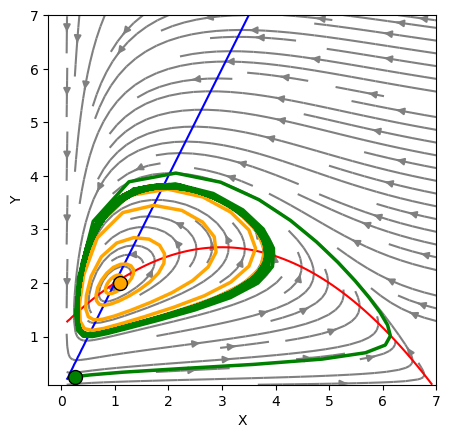

In [141]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,holling_tanner,xrange=[0.1,7],yrange=[0.1,7],nullclines=True)
ax=plot_solution(ax,holling_tanner,[1.1,2],t_end=2000,color='orange')
ax=plot_solution(ax,holling_tanner,[0.25,0.25],t_end=2000)


### Definition *limit cycle* (Definition 6 on p 188)
A limit cycle, $\Gamma$, is 
- a stable limit cycle if $\Lambda^+(\bf{x})=\Gamma \ \forall \ \bf{x} $ in some neighbourhood, all nearby trajectories are attracted to the limit cycle.
- an unstable limit cycle if $\Lambda^-(\bf{x})=\Gamma \ \forall \ \bf{x} $ in some neighbourhood, all nearby trajectories are repelled from the limit cycle.
- a semi-stable limit cycle if it's attracting on one side and repelling on the other side. 

### Definition period of a limit cycle (Definition 7 on p 119)
is given by the minimum $T$ so that $\bf{x}(t+T)=\bf{x}(t)$.

--- 

See *Example 1* on page 119.



![Skjermbilde 2024-01-22 kl. 06.07.39.png](<attachment:Skjermbilde 2024-01-22 kl. 06.07.39.png>)
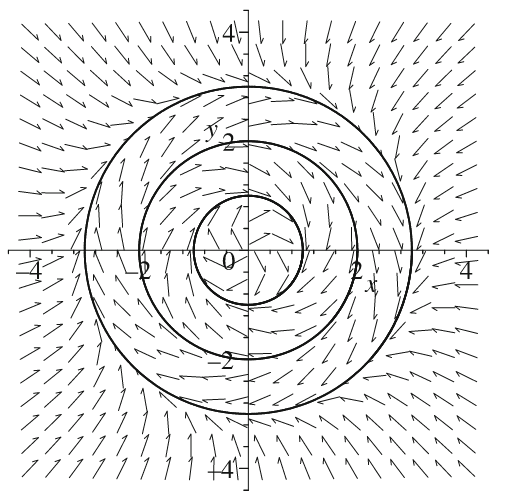

# Theorems on the existence of closed orbits
### Poincaré-Bendixson theorem
Suppose that $\gamma^+$ is contained in a bounded region in which there are finitely many critical points. Then $\Gamma^+(\gamma)$ is either:
- a single critical point
- a single closed orbit
- a graphic- critical points joined by heteroclinic orbits.

A heteroclinic orbit connects to separate critical points and takes an infinite time to make the connection. 

### Corollary 
Let $D$ be a bounded closed set containing no critical points and suppose that $D$ is positively invariant. Then there exists a limit cycle contained in D. 

### Example 2 p 121
$$
\begin{array}{rl}
\dot{x}=&y-8x^3 \\
\dot{y}=&2y-4x-2y^3
\end{array}
$$

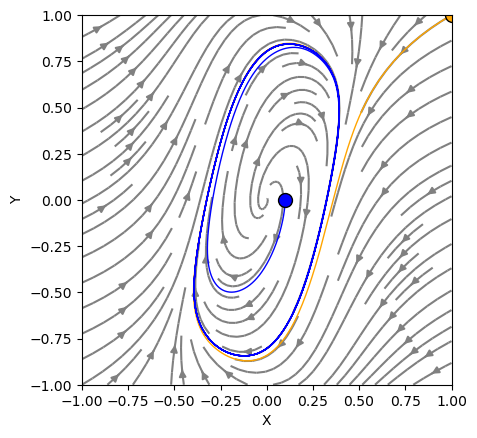

In [158]:
### Example 
def ex2p121(t,X,l=1,g=9.8):
    x,y=X
    dx=y-8*x**3
    dy=2*y-4*x-2*y**3
    return np.array([dx,dy])

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,ex2p121,xrange=[-1,1],yrange=[-1,1],nullclines=False)
ax=plot_solution(ax,ex2p121,[1.,1.],t_end=20,color='orange',linewidth=1)
ax=plot_solution(ax,ex2p121,[0.1,0],t_end=20,color='blue',linewidth=1)

### Dulacs Criterion
Consider an annular region, $A$ contained in an open set $E$. If 
$$
\nabla \cdot (\psi \bf{X}) 
$$
does not change sign in $A$, where $\psi$ is continuously differentiable, then there is at most one limit cycle entirely contained in A. 

---

Do examples 3 and 4 on pages 122-123.

### Bendixson criterion, Non existence of limit cycles in the plane 
See Theorem on P123.
